# Organoid visualization
This notebook uses Panel to visualize growth curves of organoid data

In [164]:
import numpy as np
import bokeh
import hvplot.pandas
import param
import os
import sklearn
from bokeh.sampledata.autompg import autompg
from sklearn.metrics.pairwise import cosine_similarity

import scipy.cluster.hierarchy as sch
import pandas as pd
import holoviews as hv
import panel as pn
import matplotlib.pyplot as plt
import requests


pn.extension()

In [132]:
!pip install kshape

  Created wheel for kshape: filename=kshape-1.0.1-py3-none-any.whl size=4613 sha256=96e9a0b9212183a21689060e90db076aea13651b0529815f190cc4829dca953e
  Stored in directory: /root/.cache/pip/wheels/c9/93/27/f79159e45b3e1909d64e82bea80652481a3a435464b616d4be
Successfully built kshape


In [136]:
import kshape
from kshape.core import _sbd as sbd

In [28]:
%%capture
from tqdm.notebook import tqdm
tqdm().pandas()

In [29]:
def load_well(path):
    processed_data = np.load(path)
    img = processed_data['arr_0']
    mask = processed_data['arr_1']
    times = processed_data['arr_2']

    return img, mask, times

def get_cell_counts(mask):
    n_frames = mask.shape[0]
    counts = []
    
    for i in range(n_frames):
        n_cells = len(np.unique(mask[i,...,0]))-1
        counts.append(n_cells)
    counts = np.array(counts)
    
    return counts

def load_organoid_data():
    data_dict = {}
    base_path = '/data_hdd2/organoid_npz/'
    for expt in os.listdir(base_path):
        data_dict[expt] = {}
        expt_path = os.path.join(base_path, expt)
        for folder in os.listdir(expt_path):
            print("Loading folder {} from experiment {}".format(folder, expt))
            
            data_dict[expt][folder] = {}
            folder_path = os.path.join(expt_path, folder)
            for well in tqdm(os.listdir(folder_path)):
                well_path = os.path.join(folder_path, well)
                img, mask, times = load_well(well_path)
                
                cell_counts = get_cell_counts(mask)
                data_dict[expt][folder][well] = {}
                data_dict[expt][folder][well]['times'] = times
                data_dict[expt][folder][well]['cell_counts'] = cell_counts
                
    return data_dict
                
data_dict = load_organoid_data()    

Loading folder A1_WT from experiment 4230_all_early_late_20200306


  0%|          | 0/3600 [00:00<?, ?it/s]

Loading folder A2_P53 from experiment 4230_all_early_late_20200306


  0%|          | 0/3600 [00:00<?, ?it/s]

Loading folder A3_P53_ARID1A from experiment 4230_all_early_late_20200306


  0%|          | 0/3600 [00:00<?, ?it/s]

Loading folder B2_WT from experiment 4230_all_early_late_20200306


  0%|          | 0/6000 [00:00<?, ?it/s]

Loading folder C2_P53_APC from experiment 4230_all_early_late_20200306


  0%|          | 0/6000 [00:00<?, ?it/s]

Loading folder B3_P53_ARID1A from experiment 4230_P53_ARID1A_200um_20200710


  0%|          | 0/1200 [00:00<?, ?it/s]

Loading folder A1_P53 from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder A2_P53 from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder A3_P53_ARID1A from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder A4_P53_ARID1A from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder B1_P53 from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/3600 [00:00<?, ?it/s]

Loading folder B2_P53 from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder B3_P53_ARID1A from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/6000 [00:00<?, ?it/s]

Loading folder B4_P53_ARID1A from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/6000 [00:00<?, ?it/s]

Loading folder C1_P53 from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/6000 [00:00<?, ?it/s]

Loading folder C2_P53 from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder C3_P53_ARID1A from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder C4_P53_ARID1A from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder A1_P53 from experiment 4230_P53_timing_20200123


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder A2_P53 from experiment 4230_P53_timing_20200123


  0%|          | 0/3600 [00:00<?, ?it/s]

Loading folder A3_P53 from experiment 4230_P53_timing_20200123


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder A4_P53 from experiment 4230_P53_timing_20200123


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder B1_P53 from experiment 4230_P53_timing_20200123


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder B2_P53 from experiment 4230_P53_timing_20200123


  0%|          | 0/6000 [00:00<?, ?it/s]

Loading folder B3_P53 from experiment 4230_P53_timing_20200123


  0%|          | 0/3600 [00:00<?, ?it/s]

Loading folder B4_P53 from experiment 4230_P53_timing_20200123


  0%|          | 0/6000 [00:00<?, ?it/s]

Loading folder A1_WT from experiment 4230_WT_P_PA_AP_20200603


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder A2_P53 from experiment 4230_WT_P_PA_AP_20200603


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder A3_P53_ARID1A from experiment 4230_WT_P_PA_AP_20200603


  0%|          | 0/6000 [00:00<?, ?it/s]

Loading folder B1_WT from experiment 4230_WT_P_PA_AP_20200603


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder B2_P53 from experiment 4230_WT_P_PA_AP_20200603


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder B3_P53_ARID1A from experiment 4230_WT_P_PA_AP_20200603


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder C1_WT from experiment 4230_WT_P_PA_AP_20200603


  0%|          | 0/6000 [00:00<?, ?it/s]

Loading folder C2_P53 from experiment 4230_WT_P_PA_AP_20200603


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder C3_P53_ARID1A from experiment 4230_WT_P_PA_AP_20200603


  0%|          | 0/3600 [00:00<?, ?it/s]

Loading folder C4_P53_APC from experiment 4230_WT_P_PA_AP_20200603


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder A1_P53 from experiment 4230_WT_P_PA_AP_20200611


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder A2_WT from experiment 4230_WT_P_PA_AP_20200611


  0%|          | 0/3600 [00:00<?, ?it/s]

Loading folder B2_P53_APC from experiment 4230_WT_P_PA_AP_20200611


  0%|          | 0/3600 [00:00<?, ?it/s]

Loading folder B3_WT from experiment 4230_WT_P_PA_AP_20200611


  0%|          | 0/6000 [00:00<?, ?it/s]

Loading folder B4_P53 from experiment 4230_WT_P_PA_AP_20200611


  0%|          | 0/3600 [00:00<?, ?it/s]

Loading folder C1_P53_APC from experiment 4230_WT_P_PA_AP_20200611


  0%|          | 0/3600 [00:00<?, ?it/s]

Loading folder C3_P53 from experiment 4230_WT_P_PA_AP_20200611


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder A1_P53_ARID1A from experiment repeat_4230_P53_ARID1A_20200227


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder A2_P53_ARID1A from experiment repeat_4230_P53_ARID1A_20200227


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder A3_P53 from experiment repeat_4230_P53_ARID1A_20200227


  0%|          | 0/3600 [00:00<?, ?it/s]

Loading folder A4_P53 from experiment repeat_4230_P53_ARID1A_20200227


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder B1_P53_ARID1A from experiment repeat_4230_P53_ARID1A_20200227


  0%|          | 0/6000 [00:00<?, ?it/s]

Loading folder B2_P53_ARID1A from experiment repeat_4230_P53_ARID1A_20200227


  0%|          | 0/4800 [00:00<?, ?it/s]

Loading folder B3_P53 from experiment repeat_4230_P53_ARID1A_20200227


  0%|          | 0/6000 [00:00<?, ?it/s]

Loading folder B4_P53 from experiment repeat_4230_P53_ARID1A_20200227


  0%|          | 0/6000 [00:00<?, ?it/s]

In [31]:
import pickle

with open('organoid.pkl', 'wb') as fp:
    pickle.dump(data_dict, fp, protocol=pickle.HIGHEST_PROTOCOL)

## Create data visualization

In [90]:
# Load data dictionary
with open('organoid.pkl', 'rb') as fp:
    data_dict = pickle.load(fp)

In [151]:
# Pre-compute visualizations
def compute_viz(data_dict):
    viz_dict = {}
    
    for expt in data_dict.keys():
        viz_dict[expt] = {}
        folders = data_dict[expt]
        
        for folder in folders.keys():
            viz_dict[expt][folder] = {}
            wells = data_dict[expt][folder]
    
            print("Processing folder {} from experiment {}".format(folder, expt))
            times_list = []
            counts_list = []
            for well in wells.keys():
                cell_counts = data_dict[expt][folder][well]['cell_counts']
                if np.amax(cell_counts) > 2:
                    times = data_dict[expt][folder][well]['times']
                    times -= np.amin(times)
                    times = times.astype('float')/3600

                    idx = np.argsort(times)
                    times = times[idx]
                    cell_counts = cell_counts[idx]

                    times_list.append(times)
                    counts_list.append(cell_counts)

            times = np.stack(times_list, axis=0)
            cell_counts = np.stack(counts_list, axis=0)

            # Perform clustering
            n_wells = cell_counts.shape[0]
            distance_matrix = np.zeros((n_wells, n_wells))

            for i in tqdm(range(n_wells)):
                for j in range(n_wells):
                    distance_matrix[i,j], _ = sbd(cell_counts[i,:], cell_counts[j,:])
            
            viz_dict[expt][folder]['distance_matrix'] = distance_matrix
            viz_dict[expt][folder]['times'] = times
            viz_dict[expt][folder]['cell_counts'] = cell_counts
            
    return viz_dict
            
viz_dict = compute_viz(data_dict)         


Processing folder A1_WT from experiment 4230_all_early_late_20200306


  0%|          | 0/795 [00:00<?, ?it/s]

Processing folder A2_P53 from experiment 4230_all_early_late_20200306


  0%|          | 0/1288 [00:00<?, ?it/s]

Processing folder A3_P53_ARID1A from experiment 4230_all_early_late_20200306


  0%|          | 0/1221 [00:00<?, ?it/s]

Processing folder B2_WT from experiment 4230_all_early_late_20200306


  0%|          | 0/1361 [00:00<?, ?it/s]

Processing folder C2_P53_APC from experiment 4230_all_early_late_20200306


  0%|          | 0/2315 [00:00<?, ?it/s]

Processing folder B3_P53_ARID1A from experiment 4230_P53_ARID1A_200um_20200710


  0%|          | 0/213 [00:00<?, ?it/s]

Processing folder A1_P53 from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/1454 [00:00<?, ?it/s]

Processing folder A2_P53 from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/1127 [00:00<?, ?it/s]

Processing folder A3_P53_ARID1A from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/1996 [00:00<?, ?it/s]

Processing folder A4_P53_ARID1A from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/2318 [00:00<?, ?it/s]

Processing folder B1_P53 from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/1189 [00:00<?, ?it/s]

Processing folder B2_P53 from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/1750 [00:00<?, ?it/s]

Processing folder B3_P53_ARID1A from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/2788 [00:00<?, ?it/s]

Processing folder B4_P53_ARID1A from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/2800 [00:00<?, ?it/s]

Processing folder C1_P53 from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/2004 [00:00<?, ?it/s]

Processing folder C2_P53 from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/1596 [00:00<?, ?it/s]

Processing folder C3_P53_ARID1A from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/2219 [00:00<?, ?it/s]

Processing folder C4_P53_ARID1A from experiment 4230_P53_ARID1A_20200114


  0%|          | 0/2299 [00:00<?, ?it/s]

Processing folder A1_P53 from experiment 4230_P53_timing_20200123


  0%|          | 0/1644 [00:00<?, ?it/s]

Processing folder A2_P53 from experiment 4230_P53_timing_20200123


  0%|          | 0/903 [00:00<?, ?it/s]

Processing folder A3_P53 from experiment 4230_P53_timing_20200123


  0%|          | 0/766 [00:00<?, ?it/s]

Processing folder A4_P53 from experiment 4230_P53_timing_20200123


  0%|          | 0/567 [00:00<?, ?it/s]

Processing folder B1_P53 from experiment 4230_P53_timing_20200123


  0%|          | 0/1022 [00:00<?, ?it/s]

Processing folder B2_P53 from experiment 4230_P53_timing_20200123


  0%|          | 0/1130 [00:00<?, ?it/s]

Processing folder B3_P53 from experiment 4230_P53_timing_20200123


  0%|          | 0/691 [00:00<?, ?it/s]

Processing folder B4_P53 from experiment 4230_P53_timing_20200123


  0%|          | 0/1006 [00:00<?, ?it/s]

Processing folder A1_WT from experiment 4230_WT_P_PA_AP_20200603


  0%|          | 0/336 [00:00<?, ?it/s]

Processing folder A2_P53 from experiment 4230_WT_P_PA_AP_20200603


  0%|          | 0/1649 [00:00<?, ?it/s]

Processing folder A3_P53_ARID1A from experiment 4230_WT_P_PA_AP_20200603


  0%|          | 0/743 [00:00<?, ?it/s]

Processing folder B1_WT from experiment 4230_WT_P_PA_AP_20200603


  0%|          | 0/330 [00:00<?, ?it/s]

Processing folder B2_P53 from experiment 4230_WT_P_PA_AP_20200603


  0%|          | 0/1625 [00:00<?, ?it/s]

Processing folder B3_P53_ARID1A from experiment 4230_WT_P_PA_AP_20200603


  0%|          | 0/744 [00:00<?, ?it/s]

Processing folder C1_WT from experiment 4230_WT_P_PA_AP_20200603


  0%|          | 0/356 [00:00<?, ?it/s]

Processing folder C2_P53 from experiment 4230_WT_P_PA_AP_20200603


  0%|          | 0/1947 [00:00<?, ?it/s]

Processing folder C3_P53_ARID1A from experiment 4230_WT_P_PA_AP_20200603


  0%|          | 0/653 [00:00<?, ?it/s]

Processing folder C4_P53_APC from experiment 4230_WT_P_PA_AP_20200603


  0%|          | 0/653 [00:00<?, ?it/s]

Processing folder A1_P53 from experiment 4230_WT_P_PA_AP_20200611


  0%|          | 0/1571 [00:00<?, ?it/s]

Processing folder A2_WT from experiment 4230_WT_P_PA_AP_20200611


  0%|          | 0/1594 [00:00<?, ?it/s]

Processing folder B2_P53_APC from experiment 4230_WT_P_PA_AP_20200611


  0%|          | 0/1307 [00:00<?, ?it/s]

Processing folder B3_WT from experiment 4230_WT_P_PA_AP_20200611


  0%|          | 0/1089 [00:00<?, ?it/s]

Processing folder B4_P53 from experiment 4230_WT_P_PA_AP_20200611


  0%|          | 0/550 [00:00<?, ?it/s]

Processing folder C1_P53_APC from experiment 4230_WT_P_PA_AP_20200611


  0%|          | 0/1504 [00:00<?, ?it/s]

Processing folder C3_P53 from experiment 4230_WT_P_PA_AP_20200611


  0%|          | 0/754 [00:00<?, ?it/s]

Processing folder A1_P53_ARID1A from experiment repeat_4230_P53_ARID1A_20200227


  0%|          | 0/1189 [00:00<?, ?it/s]

Processing folder A2_P53_ARID1A from experiment repeat_4230_P53_ARID1A_20200227


  0%|          | 0/1930 [00:00<?, ?it/s]

Processing folder A3_P53 from experiment repeat_4230_P53_ARID1A_20200227


  0%|          | 0/632 [00:00<?, ?it/s]

Processing folder A4_P53 from experiment repeat_4230_P53_ARID1A_20200227


  0%|          | 0/727 [00:00<?, ?it/s]

Processing folder B1_P53_ARID1A from experiment repeat_4230_P53_ARID1A_20200227


  0%|          | 0/1418 [00:00<?, ?it/s]

Processing folder B2_P53_ARID1A from experiment repeat_4230_P53_ARID1A_20200227


  0%|          | 0/1039 [00:00<?, ?it/s]

Processing folder B3_P53 from experiment repeat_4230_P53_ARID1A_20200227


  0%|          | 0/967 [00:00<?, ?it/s]

Processing folder B4_P53 from experiment repeat_4230_P53_ARID1A_20200227


  0%|          | 0/960 [00:00<?, ?it/s]

In [160]:
def compute_linkage(viz_dict):
    for expt in tqdm(viz_dict.keys()):
        folders = viz_dict[expt]
        
        for folder in folders.keys():
            distance_matrix = viz_dict[expt][folder]['distance_matrix']
            Y = sch.linkage(distance_matrix, method='ward')
            viz_dict[expt][folder]['linkage'] = Y
            
    return viz_dict

viz_dict = compute_linkage(viz_dict)  
with open('organoid_viz.pkl', 'wb') as fp:
    pickle.dump(viz_dict, fp, protocol=pickle.HIGHEST_PROTOCOL)

  0%|          | 0/7 [00:00<?, ?it/s]

In [163]:
def create_pkl(v_dict):
    for expt in tqdm(v_dict.keys()):
        folders = v_dict[expt]
        
        for folder in folders.keys():
            del v_dict[expt][folder]['distance_matrix']
    
    with open('organoid_viz_v2.pkl', 'wb') as fp:
        pickle.dump(v_dict, fp, protocol=pickle.HIGHEST_PROTOCOL)
    return v_dict

viz_dict_save = create_pkl(viz_dict)

  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
url = 'https://storage.googleapis.com/daves-new-bucket/organoid_viz_v2.pkl'
    

print('Beginning file download with requests')

r = requests.get(url)

with open('/Users/scott/Downloads/cat3.jpg', 'wb') as f:
    f.write(r.content)

Row
    [0] Column(margin=5, name='OrganoidExplorer', width=300)
        [0] StaticText(value='<b>OrganoidExplorer</b>')
        [1] Select(name='Expt', options=OrderedDict([('4230_all_ea...]), value='4230_all_early_late_20200...)
        [2] Select(name='Folder', options=OrderedDict([('A1_WT', ...]), value='A1_WT')
        [3] Select(name='Color', options=OrderedDict([('Greys', ...]), value='Reds')
    [1] ParamMethod(method)
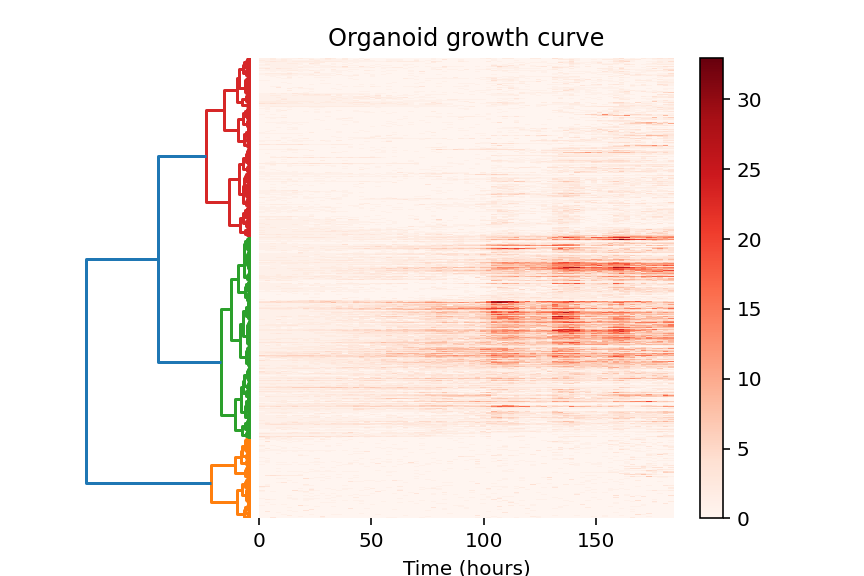

In [162]:
class OrganoidExplorer(param.Parameterized):
    
    expts = list(data_dict.keys())
    expt = param.ObjectSelector(default=expts[0], objects=expts)
    folder = param.ObjectSelector(default=list(data_dict[expts[0]].keys())[0], 
                                  objects=list(data_dict[expts[0]].keys()))
    color = param.ObjectSelector(default='Reds', objects=['Greys', 'Reds', 'Blues', 'Purples', 'Greens', 'Oranges'])
    
    @param.depends('expt', watch=True)
    def _update_folder(self):
        folders = list(data_dict[self.expt].keys())
        self.param['folder'].objects = folders
        self.folder = folders[0]
    
    @param.depends('expt', 'folder', 'color')
    def plot(self):

        times_list = []
        counts_list = []
        
        times = viz_dict[self.expt][self.folder]['times']
        cell_counts = viz_dict[self.expt][self.folder]['cell_counts']
        Y = viz_dict[self.expt][self.folder]['linkage']
        
        # Plot dendrogram
        fig = plt.figure()
        
        ax_dendro = fig.add_axes([0.09, 0.1, 0.2, 0.8], frame_on = False)
        Z = sch.dendrogram(Y, orientation = 'left', color_threshold = 0.5*np.amax(Y[:,2]))

        ax_dendro.set_xticks([])
        ax_dendro.set_yticks([])
        
        # Plot growth curves
        ax_heatmap = fig.add_axes([0.3, 0.1, 0.6, 0.8], frame_on=False)
        
        index = Z['leaves']
        gc_ordered = cell_counts[index,:]
        extent = [0,times[0,-1],0,cell_counts.shape[0]-1]
        heatmap = ax_heatmap.matshow(gc_ordered, 
                           aspect='auto',
                           origin='lower',
                           cmap=plt.get_cmap(self.color), 
                           interpolation='none',
                           extent=extent)
        ax_heatmap.xaxis.tick_bottom()
        fig.colorbar(heatmap, orientation='vertical')                
        ax_heatmap.set_yticks([])
        ax_heatmap.set_xlabel('Time (hours)')
        ax_heatmap.set_title('Organoid growth curve')
        plt.close(fig)
        return fig
            
explorer = OrganoidExplorer()
pn.Row(explorer.param, explorer.plot)